### 1. Importa Bibliotecas utilizadas para fazer a análise exploratória de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

### 2. Lê os dados e imprime as cinco primeiras linhas

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### 3. Análise descritiva

Informa o nome, a quantidade de valores não nulos e o tipo de dados das colunas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Para manter a consistência da linguagem utilizadas, renomeie os nomes das colunas que estavam em português para inglês

In [4]:
df = df.rename(columns={'nome': 'name', 'bairro_group': 'neighborhood_group', 'bairro': 'neighborhood',
                        'minimo_noites': 'minimum_nights','numero_de_reviews': 'number_of_reviews',
                        'ultima_review': 'last_review', 'reviews_por_mes': 'reviews_per_month',
                        'calculado_host_listings_count': 'host_listing_count_calculated',
                        'disponibilidade_365': '365_days_availability'})

O dicionário dos dados ficam do seguinte jeito:

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

name - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

neighborhood_group - Contém o nome do bairro onde o anúncio está localizado

neighborhood - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimum_nights - Contém o número mínimo de noites que o usuário deve reservar

number_of_reviews - Contém o número de comentários dados a cada listagem

last_review - Contém a data da última revisão dada à listagem

reviews_per_month - Contém o número de avaliações fornecidas por mês

host_listing_count_calculated - Contém a quantidade de listagem por host

365_days_availability - Contém o número de dias em que o anúncio está disponível para reserva


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighborhood_group',
       'neighborhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_listing_count_calculated',
       '365_days_availability'],
      dtype='object')

In [6]:
df.shape

(48894, 16)

In [7]:
df.duplicated().sum()

0

Ao rodar a célula anterior, concluímos que não tem linhas duplicadas no dataset, logo, nenhum imóvel é ofertado mais de uma vez.

In [8]:
df.nunique()

id                               48894
name                             47904
host_id                          37457
host_name                        11452
neighborhood_group                   5
neighborhood                       221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimum_nights                     109
number_of_reviews                  394
last_review                       1764
reviews_per_month                  937
host_listing_count_calculated       47
365_days_availability              366
dtype: int64

In [9]:
df.dtypes

id                                 int64
name                              object
host_id                            int64
host_name                         object
neighborhood_group                object
neighborhood                      object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimum_nights                     int64
number_of_reviews                  int64
last_review                       object
reviews_per_month                float64
host_listing_count_calculated      int64
365_days_availability              int64
dtype: object

Para tomar consciência da quantidade de campos nulos e da porcentagem, resolvi criar a tabela a seguir

In [10]:
sum_null_data = df.isnull().sum()
missing_data = sum_null_data.to_frame('sum').join((sum_null_data / df.shape[0] * 100).to_frame('percentage'))
missing_data

,sum,percentage
id,0,0.000000
name,16,0.032724
host_id,0,0.000000
host_name,21,0.042950
neighborhood_group,0,0.000000
neighborhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


Ao analisar a tabela anterior, vemos que a coluna last_reviews tem uma porcentagem de 20% de nulos, então vamos remover essa coluna do dataset já que ela tem muitos nulos e não interfere no preço do aluguel do imóvel.

In [11]:
new_df = df.drop('last_review', axis=1)

Para uma análise univariada, vamos ver a popularidade de cada bairro e cada tipo de acomodação.

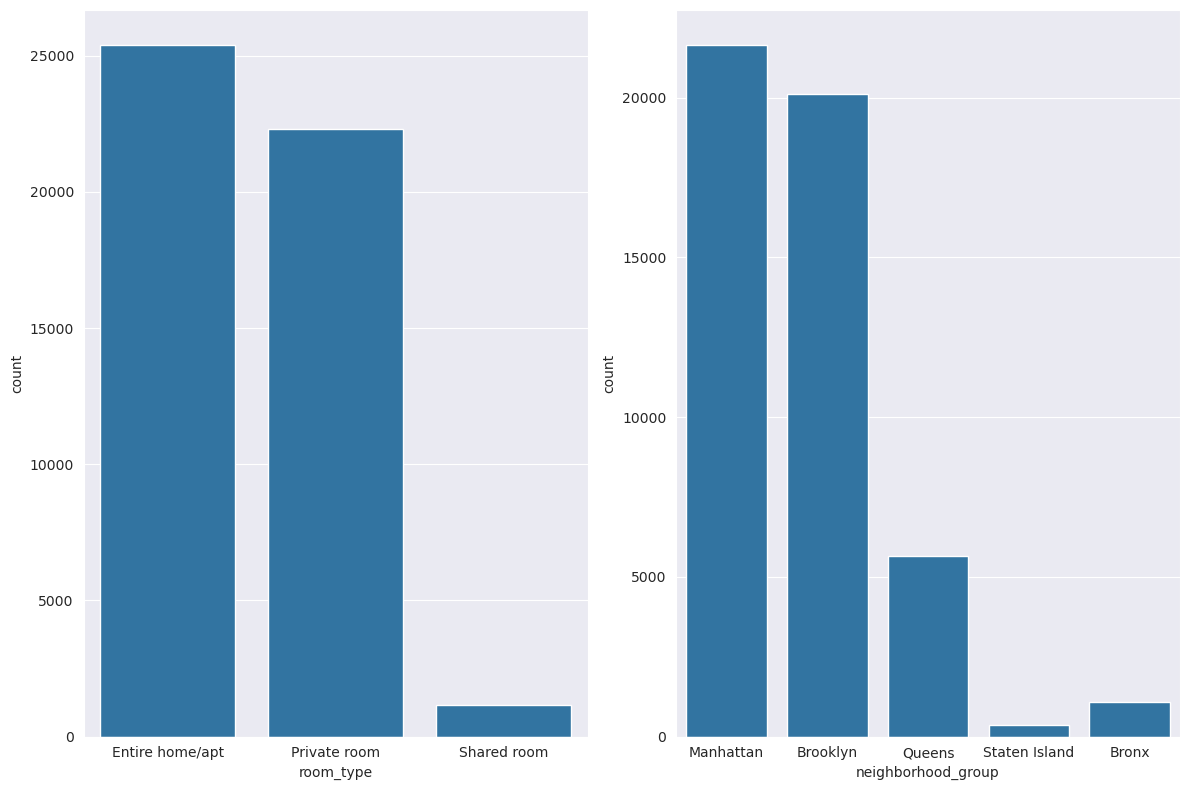

In [12]:
categorical_features = ['room_type', 'neighborhood_group']

fig, axes = plt.subplots(1, 2, figsize=((12, 8)))
axes=axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=df[feature], fill=True, ax=axes[i])
    plt.xlabel(categorical_features[i])
    axes[i].set_xlabel(feature)

plt.tight_layout()

Ao analisar esse barplot, é possível concluir que muitos anúncios de aluguel são em Manhattan e Brooklyn e tendo como acomodações mais populares a cada inteira e o quarto privado.

Na célula a seguir, um gráfico KDE é plotado com o objetivo de analisar a distorção dos dados numéricos.

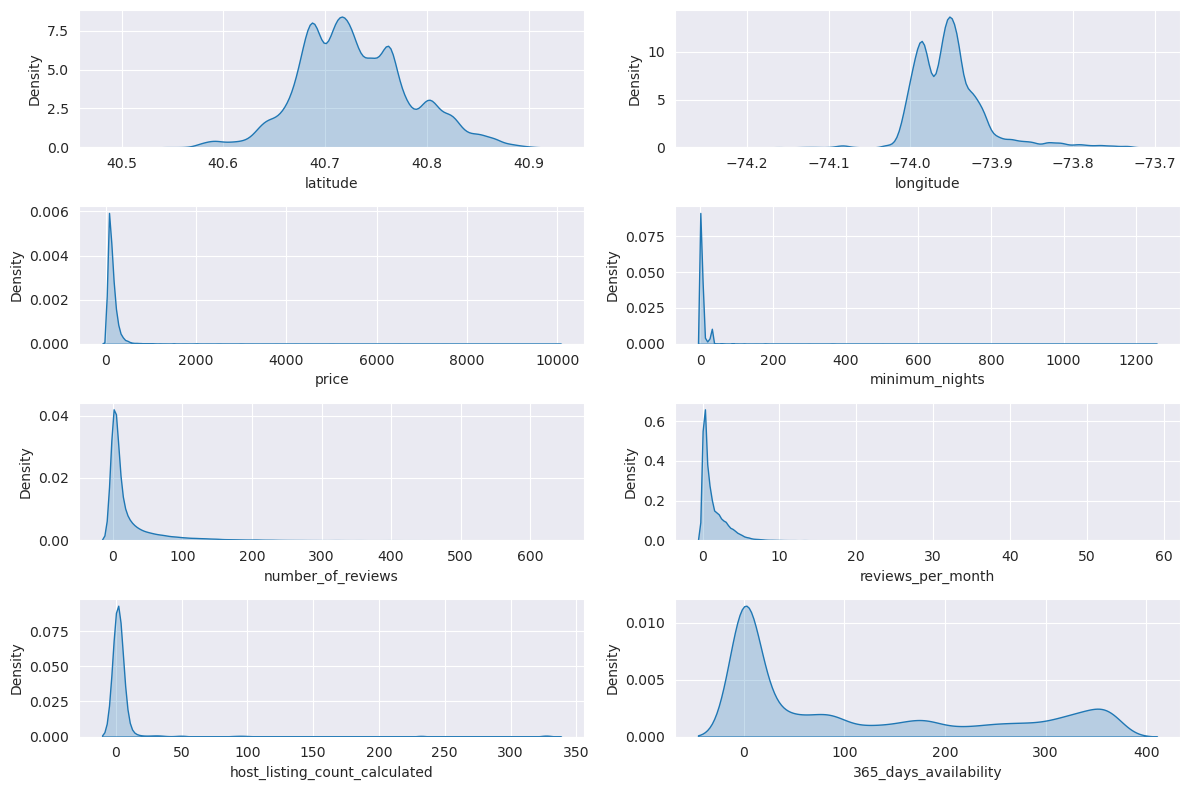

In [13]:
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'host_listing_count_calculated', '365_days_availability']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=((12, 8)))
axes=axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.kdeplot(x=df[feature], fill=True, ax=axes[i])
    axes[i].set_xlabel(feature)

plt.tight_layout()

Com a plotagem do gráfico, ficou possível visualizar que as colunas price, minimum_nights, number_of_reviews, number_per_month, host_listing_count_calculates e 365_days_availability tem valores discrepantes, sendo possível visualizar essa discrepância nas caudas que foram formadas do lado direito dos gráficos.

In [14]:
new_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count_calculated,365_days_availability
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


É possível observar colunas com outliers evidentes, como a coluna price. Para observarmos melhor a distribuição dos dados incluindo o que é outlier ou não, vamos plotar um boxplot da coluna price e 365_days_availability:

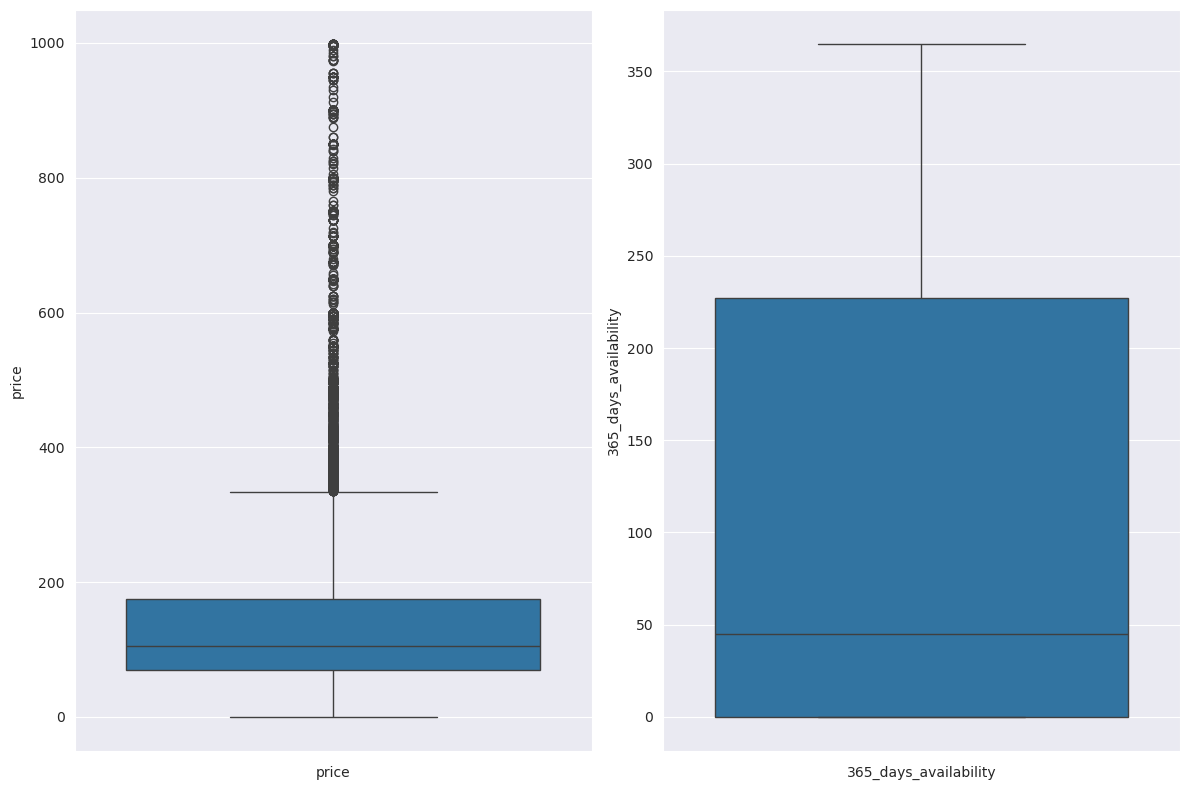

In [15]:
fig, axes = plt.subplots(1, 2, figsize=((12, 8)))
axes=axes.flatten()

for i, feature in enumerate(['price', '365_days_availability']):
    sns.boxplot(y=df[df[feature]<1000][feature], fill=True, ax=axes[i])
    plt.xlabel(categorical_features[i])
    axes[i].set_xlabel(feature)

plt.tight_layout()

Pode-se ver que a coluna price tem muitos outliers e a coluna 365_days_availability nenhum. Podemos ver também que o preço máximo não ultrapassa 400. Vamos remover os outliers da coluna preço e ver se influencia em algum resultado.

In [16]:
df_cleaned = new_df[new_df['price'].between(0, 280)]
df_cleaned.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count_calculated,365_days_availability
count,4.447000e+04,4.447000e+04,44470.000000,44470.000000,44470.000000,44470.000000,44470.000000,35895.000000,44470.000000,44470.000000
mean,1.882422e+07,6.583893e+07,40.728211,-73.949990,113.999145,6.893299,24.123094,1.374746,6.193928,108.112166
std,1.088347e+07,7.709329e+07,0.055704,0.046572,60.533290,19.899710,45.524967,1.692285,29.399916,129.917571
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.414362e+06,7.739608e+06,40.688790,-73.981120,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.941453e+07,3.028359e+07,40.721100,-73.953770,100.000000,2.000000,6.000000,0.710000,1.000000,37.000000
75%,2.872042e+07,1.045105e+08,40.763557,-73.933130,150.000000,5.000000,25.000000,2.020000,2.000000,213.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,280.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


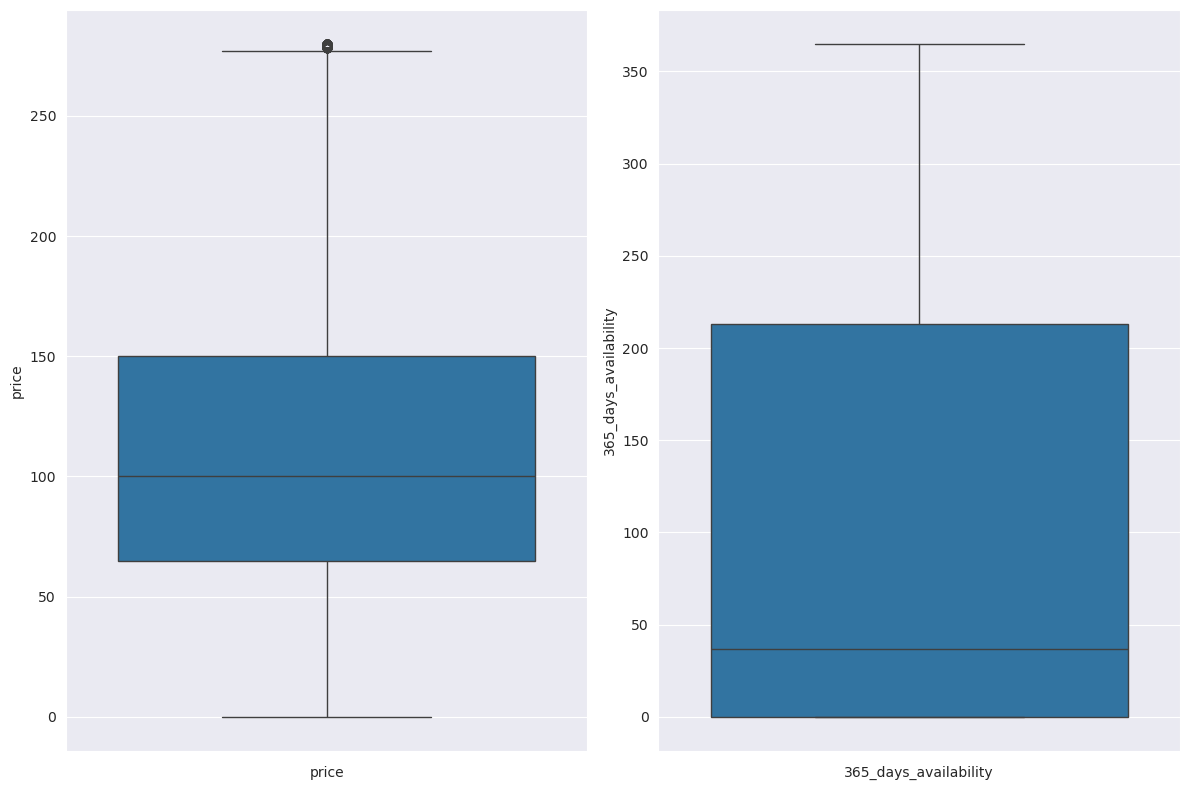

In [17]:
fig, axes = plt.subplots(1, 2, figsize=((12, 8)))
axes=axes.flatten()

for i, feature in enumerate(['price', '365_days_availability']):
    sns.boxplot(y=df_cleaned[df_cleaned[feature]<1000][feature], fill=True, ax=axes[i])
    plt.xlabel(categorical_features[i])
    axes[i].set_xlabel(feature)

plt.tight_layout()

Removendo os outliers da coluna price, vimos que os resultados mudaram consideravelmente, assim a média diminuindo de 152 para 113 e o terceiro quartil diminuindo de 175 para 150. Mas como esse outliers não são dados errados, porque claramente uma casa pode valer 10000 doláres, iremos continuar manipuladando os dados com outliers.

Outra forma de observar a distribuição dos dados:

In [18]:
df['neighborhood'].value_counts()

neighborhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Rossville                1
Woodrow                  1
Richmondtown             1
Willowbrook              1
Name: count, Length: 221, dtype: int64

Para melhor visualizar a distribuição e a relação entre preço e grupo de bairro, vamos plotar um scatterplot:

<Figure size 1200x1000 with 0 Axes>

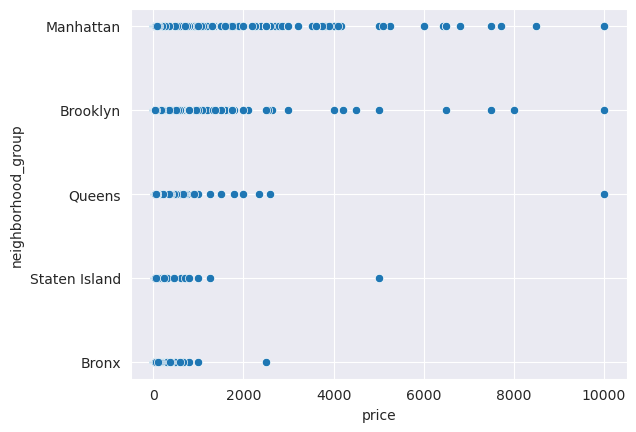

<Figure size 1200x1000 with 0 Axes>

In [19]:
sns.scatterplot(x=df['price'], y=df['neighborhood_group'], data=df)
plt.figure(figsize=(12,10))

Com o gráfico anterior, é possível observar que os preços dos imóveis em todos os bairros se concentram mais entre 0 e 1000 doláres. Com um imóvel no Bronx sendo no máximo 3000 doláres e em Manhattan, Brooklyn e Queen chegando a 10000 doláres.

Para melhor visualizar a relação entre preço e tipo de quarto, vamos plotar um boxplot:

<AxesSubplot: xlabel='neighborhood_group', ylabel='price'>

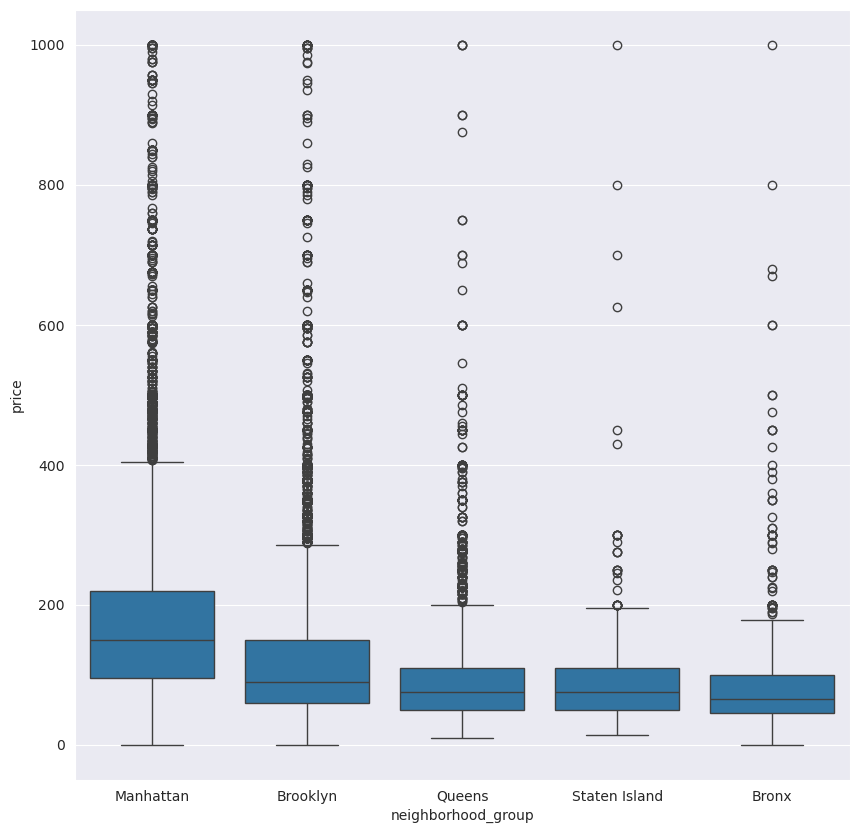

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[df['price']<=1000], y='price', x='neighborhood_group')

Ao analisar esse gráfico, diferente do gráfico scatter anterior, é possível separar os dados corretos dos outliers, e assim, concluir que 3 dos 5 bairros (Queens, Staten Island e Bronx) tem a distribuição bem parecida, com o 75% do valor até 150 dólares E já Manhattan com 75% dos valores até um pouco mais de 200 dólares.

<Figure size 1200x1000 with 0 Axes>

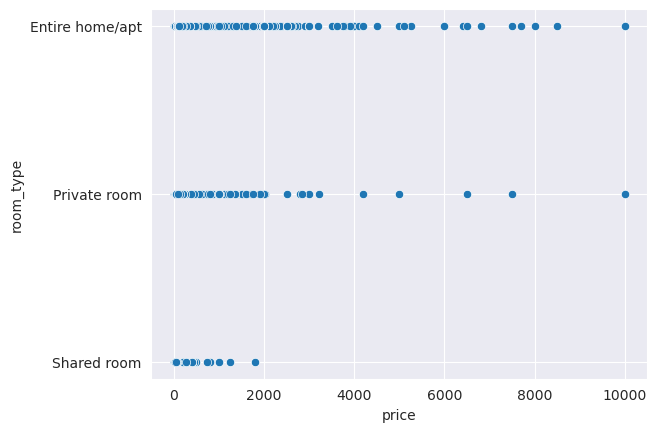

<Figure size 1200x1000 with 0 Axes>

In [21]:
sns.scatterplot(x=df['price'], y=df['room_type'], data=df)
plt.figure(figsize=(12,10))

No gráfico acima, é possível observar que os tipos de quartos tem em comum valores entre 0 e 2000 dólares. Sendo o quarto compartilhado o mais barato e com o valor menor do que 2000 doláres.

Para melhor visualizar a relação entre preço e tipo de quarto, vamos plotar um boxplot:

<AxesSubplot: xlabel='room_type', ylabel='price'>

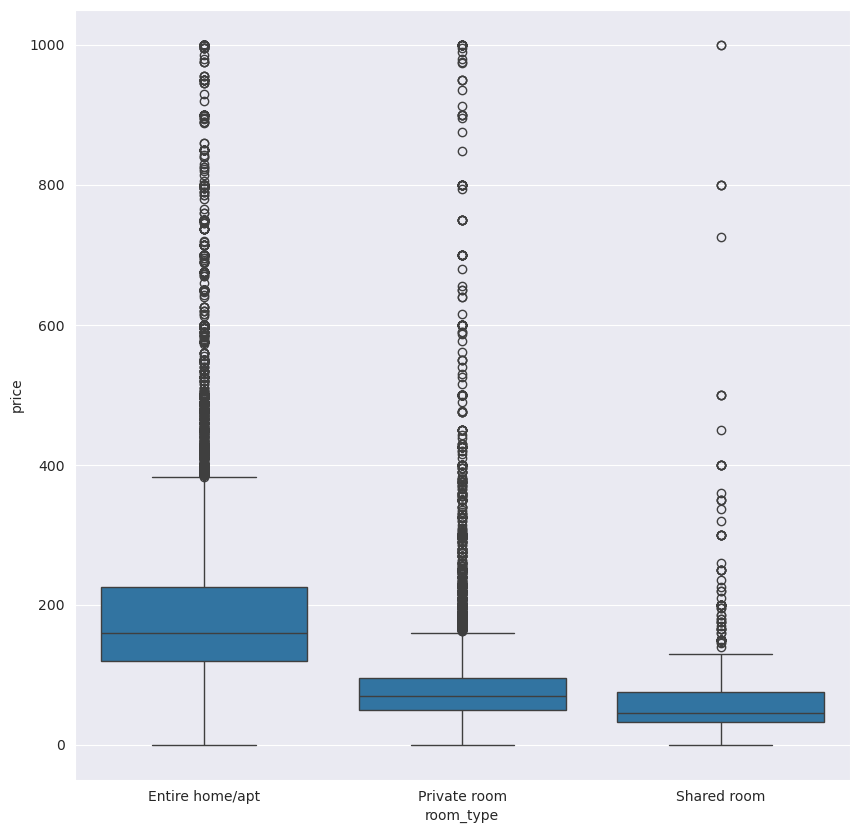

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[df['price']<=1000], y='price', x='room_type')

Diferente do gráfico scatter que plotamos, podemos diferenciar dados típicos e outliers. E ao analisá-lo, é possível ver que o quarto privado e o quarto compartilhado são bem parecidos em questão da distribuição dos seus dados, tendo os quartis bem próximos um do outro. Em comparação com a casa inteira, os outros dois são bem mais baratos, chegando em um valor típico máximo de menos de 200 doláres, enquanto a casa inteira chega a quase 400 dólares.

### Perguntas Feitas

Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Ao alugar um imóvel, é importante ter conhecimento das seguintes coisas: localização, preço e disponibilidade no ano. Para atender os seguintes tópicos, iremos supor que uma boa localização é onde mais tem imóveis para alugar, com o preço menor que 5000 dólares e disponibilidade de 365 dias por ano.

In [23]:
filtered_df = df[(df['price']<=5000)&(df['365_days_availability']==365)]

Para saber quais bairros mais tem imóveis para comprar, vamos plotar uma tabela e vamos pegar os 5 mais populares bairros:

In [24]:
df.neighborhood.value_counts().max

<bound method Series.max of neighborhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Rossville                1
Woodrow                  1
Richmondtown             1
Willowbrook              1
Name: count, Length: 221, dtype: int64>

In [25]:
filtered_df = df[(df['neighborhood']=='Williamsburg')+(df['neighborhood']=='Bedford-Stuyvesant')
                +(df['neighborhood']=='Harlem')+(df['neighborhood']=='Bushwick')+(df['neighborhood']=='Upper West Side')]

In [26]:
result=filtered_df.groupby('neighborhood')['price'].agg('mean').sort_values(ascending=True)
result

neighborhood
Bushwick               84.800406
Bedford-Stuyvesant    107.678244
Harlem                118.974041
Williamsburg          143.802806
Upper West Side       210.918316
Name: price, dtype: float64

<AxesSubplot: title={'center': 'Distribuição dos preços por bairro'}, xlabel='Bairro', ylabel='Preço'>

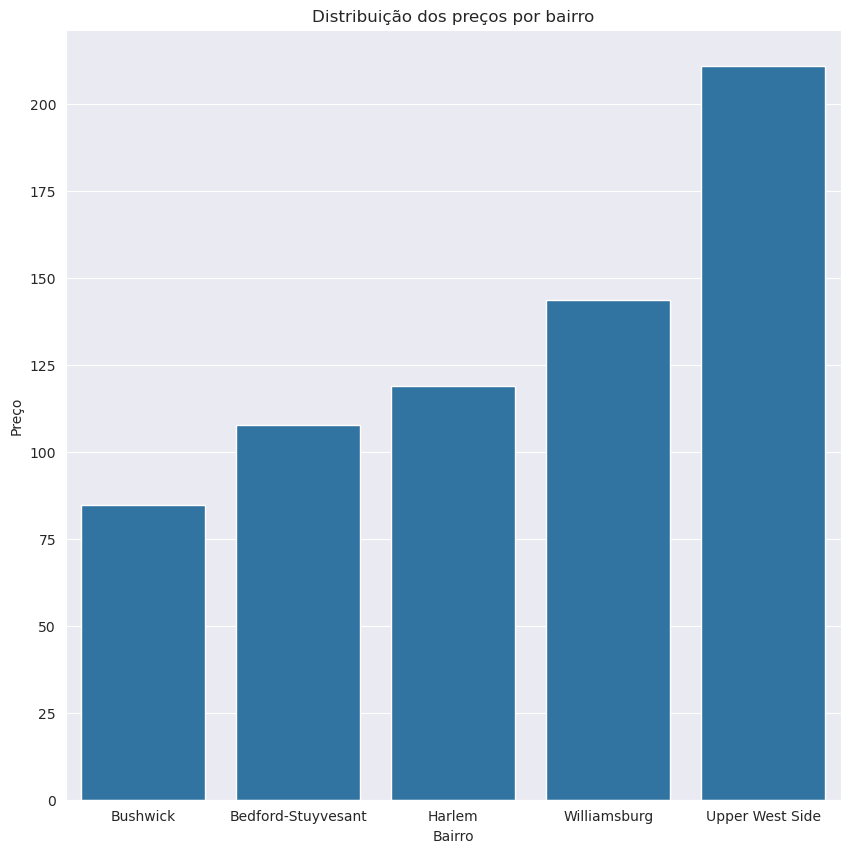

In [27]:
plt.figure(figsize=(10,10))
plt.title('Distribuição dos preços por bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço')

sns.barplot(data=result.reset_index(), x='neighborhood', y='price')

Logo, a indicação seria comprar uma casa em Bushwick, com a média do aluguel sendo de 84 reais.

O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Para resolver esse mistério, vamos tentar correlacionar as três variáveis numéricas, plotando uma matriz de correlação.

<AxesSubplot: title={'center': 'Matriz de Correlação'}>

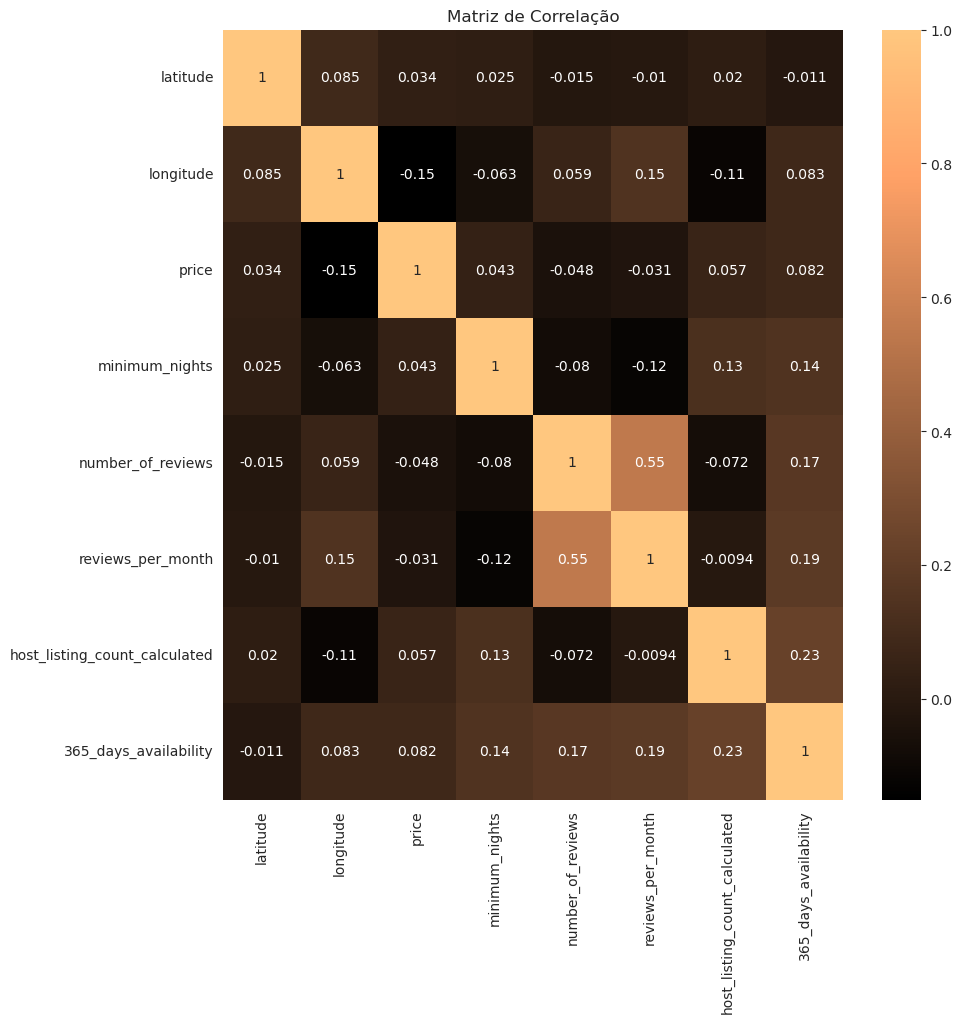

In [28]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10,10))
plt.title('Matriz de Correlação')

sns.heatmap(correlation_matrix, annot=True, cmap="copper")

Ao analisar a matriz de correlação, vemos que a correlação entre a coluna price e a coluna minimum_nights é de 0.043 e entre price e 365_days_availability é de 0.082. Isso demonstra que nenhuma coluna tem uma interferência tão grande na questão do preço, já que elas não estão tão correlacionadas. Para melhor visualização do impacto delas, vamos plotar dois gráficos para analisar:

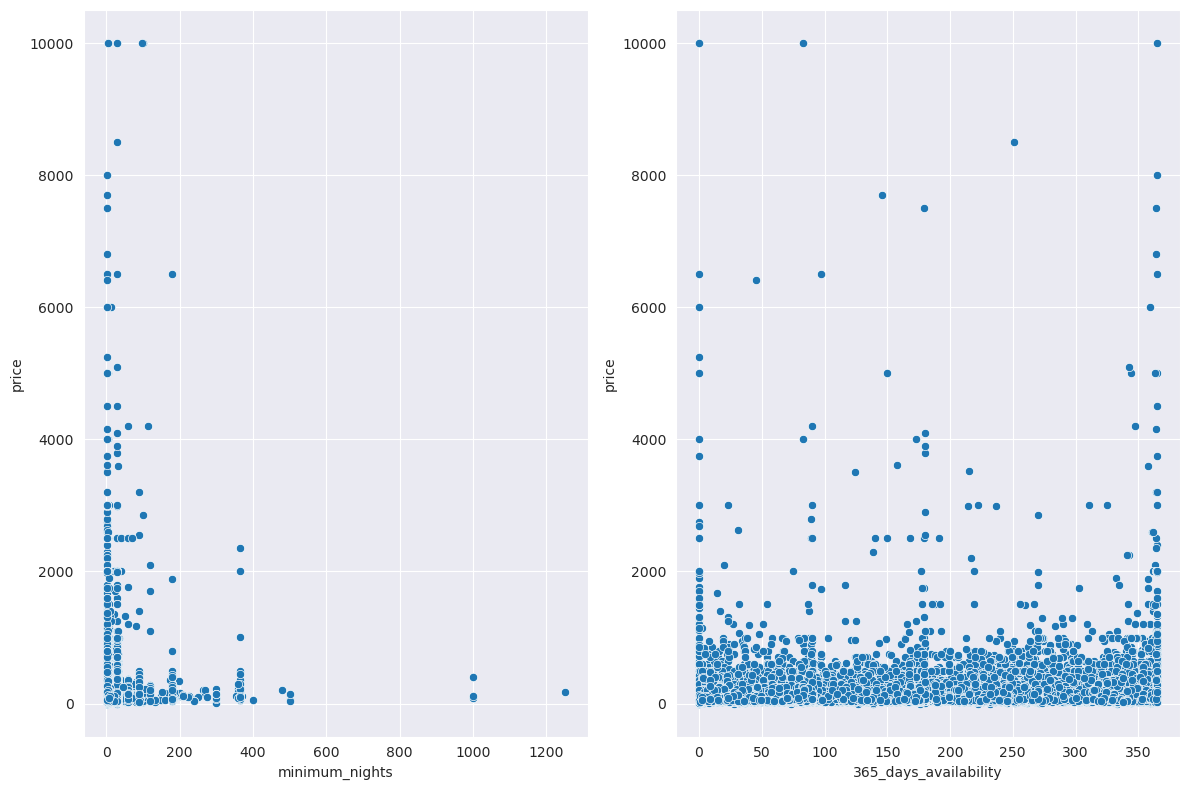

In [29]:
features = ['minimum_nights', '365_days_availability']
fig, axes = plt.subplots(1, 2, figsize=((12, 8)))
axes=axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=features[i], y='price', ax=axes[i])
    plt.xlabel(categorical_features[i])
    axes[i].set_xlabel(feature)

plt.tight_layout()

No gráfico de mínimo de noites, conseguimos ver uma relação entre a quantidade de noites e o preço, no caso, quanto maior a quantidade mínima de noites, menor o preço, mas isso não é forte o suficiente para interferir no preço, pois quando os valores de mínimo de noites são pequenos, os preços variam bastante. Já no gráfico ao lado, a relação entre eles ficam bem menos clara, pois os preços estão bastante distribuídos na quantidade de dias disponível. Com isso, concluímos que não interfere.

Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Para vermos se tem padrão, vamos plotar uma nuvem de palavras para imóveis acima de 280 e abaixo de 280. Escolhi 175 porque nas análises anteriores vimos que 75% dos valores estão até 175 doláres.

In [34]:
m = df[df['price']>280]
wc = WordCloud().generate(str(m['name'].values))
plt.imshow(wc, interpolation='bilinear')

OSError: cannot open resource

Podemos ver que as palavras que se destacam mais são Espaçosa, Larga, vemos também as palavras spa, massage, penthouse, garden, as quais são ambientes que encarecem os imóveis.

In [ ]:
m = df[df['price']<280]
wc = WordCloud().generate(str(m['name'].values))
plt.imshow(wc, interpolation='bilinear')

E nesse outro gráfico vemos palavras que são comuns em todas as casas